## Import Packages

In [594]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

## Calibrate the Camera

**We will use a 9x6 chess board to calibrate it:**

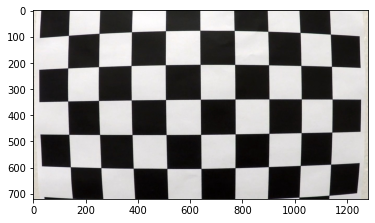

In [595]:
#reading in an calibration image

calibrate_img = mpimg.imread('camera_cal/calibration1.jpg')
plt.imshow(calibrate_img)

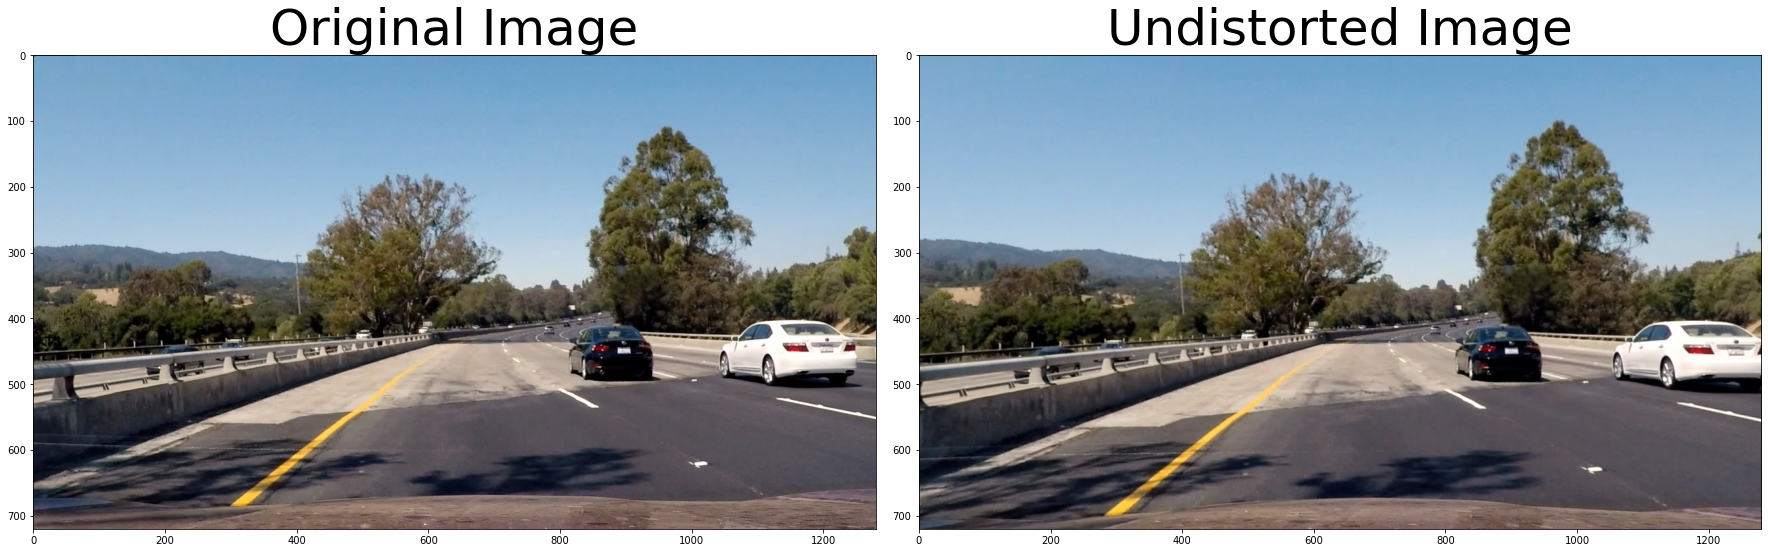

In [625]:
import glob

# Read image list
calibrate_images = glob.glob('camera_cal/calibration*.jpg')

img_car = mpimg.imread('test_images/test4.jpg')

objpoints = [] 
imgpoints = [] 


objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2) # x,y coodinates


def corners_unwarp(img, nx, ny, mtx, dist):
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    warped = []
    M = []
    
    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)

    # Return the resulting image and matrix
    return warped, M


for fname in calibrate_images:
    #read in each image
    imgcal = mpimg.imread(fname)
    # Convert image to grayscale
    gray = cv2.cvtColor(imgcal, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
        dst = cv2.undistort(imgcal, mtx, dist, None, mtx)
        # draw and detect the image
        # img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        
        cv2.imwrite('output_camera_cal/' + fname, dst)
        


dst2 = cv2.undistort(img_car, mtx, dist, None, mtx)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_car)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst2)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Now lets Sobel transform in the test images

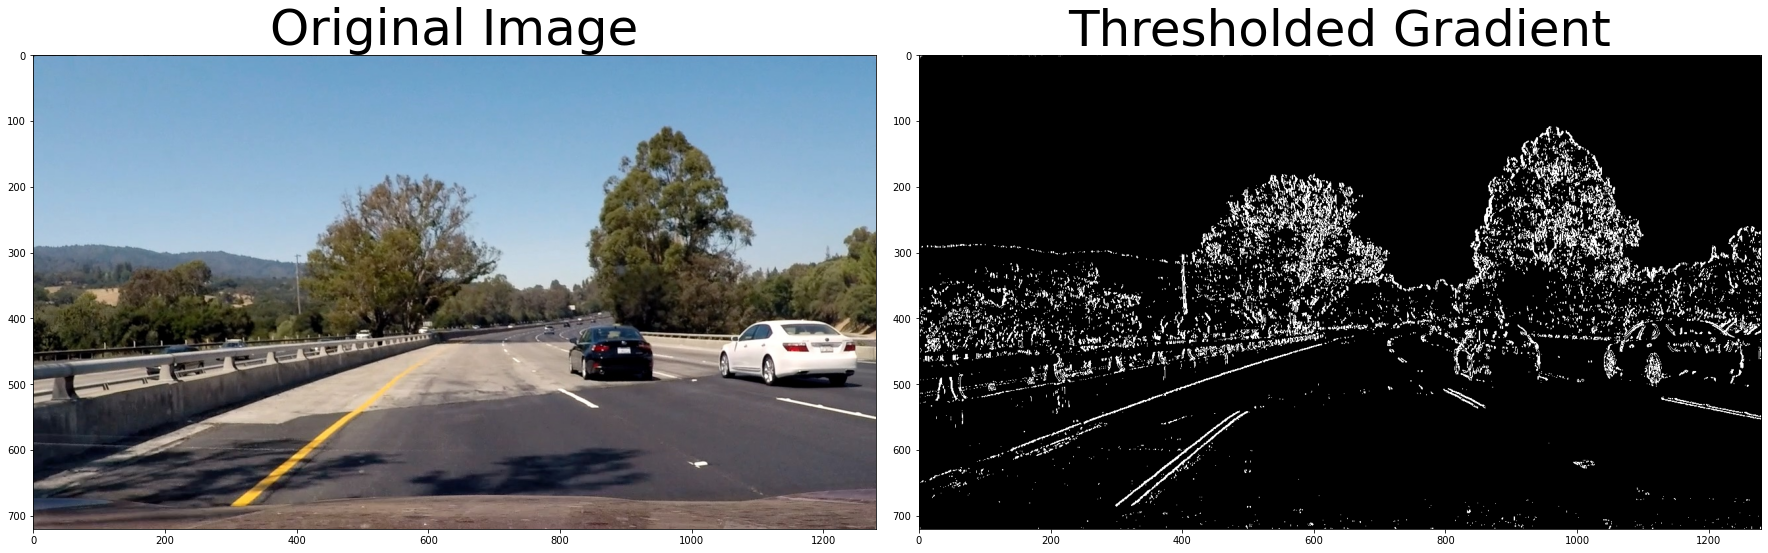

In [626]:
# Read in an image and grayscale it ##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
image = mpimg.imread('test_images/test4.jpg')
def abs_sobel_thresh(img, orient, mag_thresh):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1

    return binary_output




grad_binary = abs_sobel_thresh(image,'x', (20, 100))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Lets take Magnitude of the Gradient

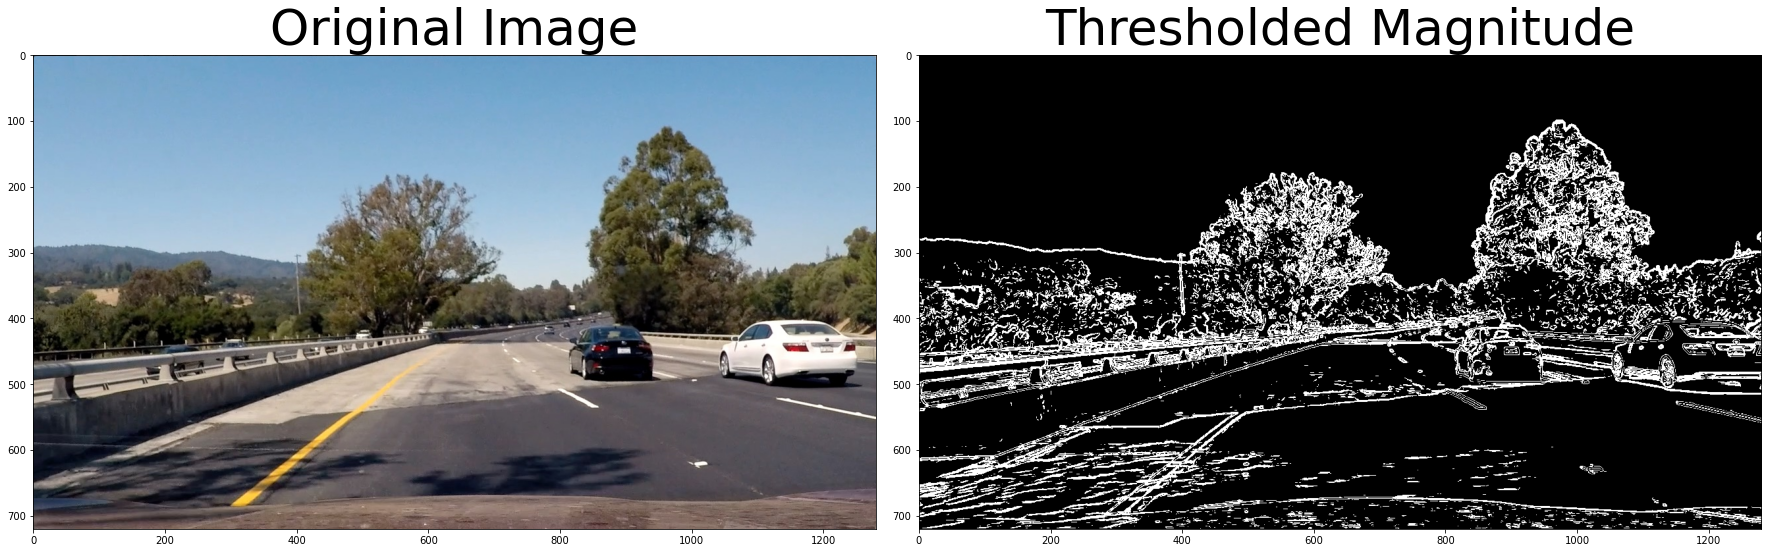

In [627]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
def mag_thresh(img, sobel_kernel, mag_thresh):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    return binary_output
    
# Run the function

undistorted = cv2.undistort(image, mtx, dist, None, mtx)
mag_binary = mag_thresh(undistorted, 3, (20, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Lets take take the direction of the gradient

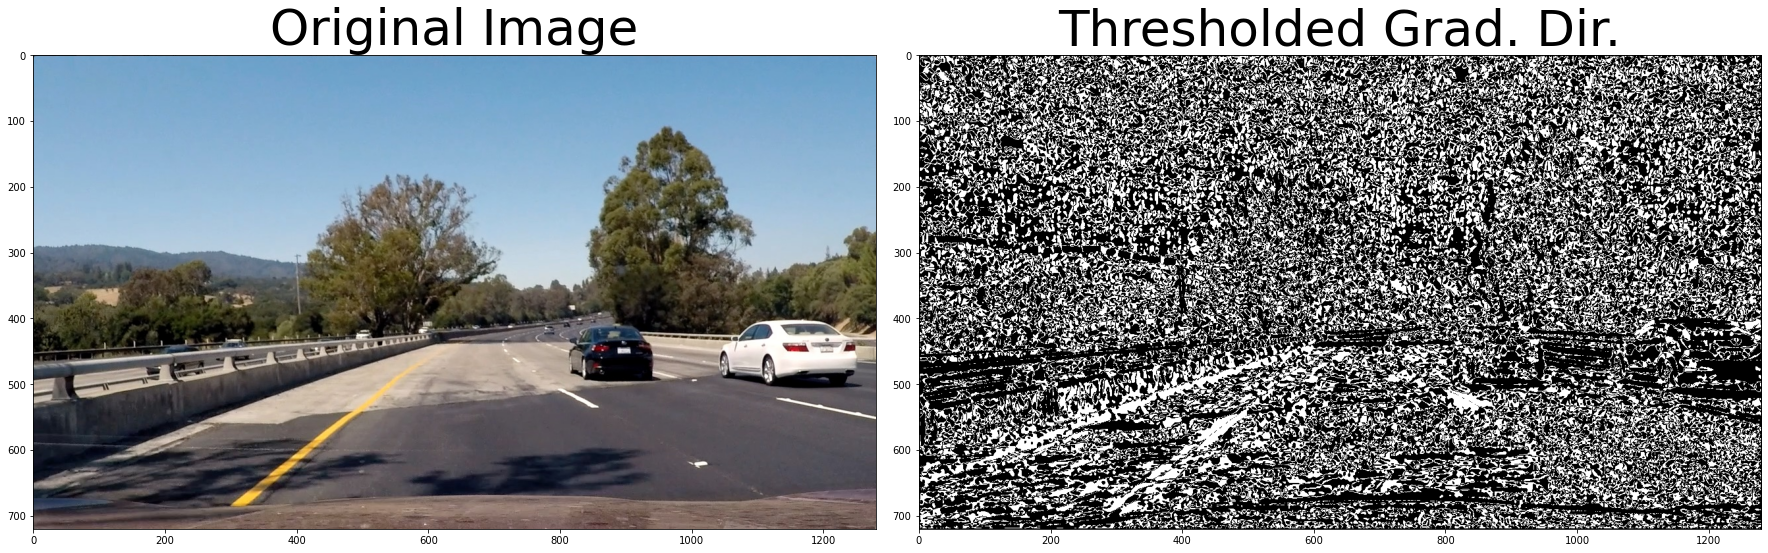

In [628]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    return binary_output
    
# Run the function
undistorted = cv2.undistort(image, mtx, dist, None, mtx)
dir_binary = dir_threshold(undistorted, 15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Now lets combine all the Thresholds

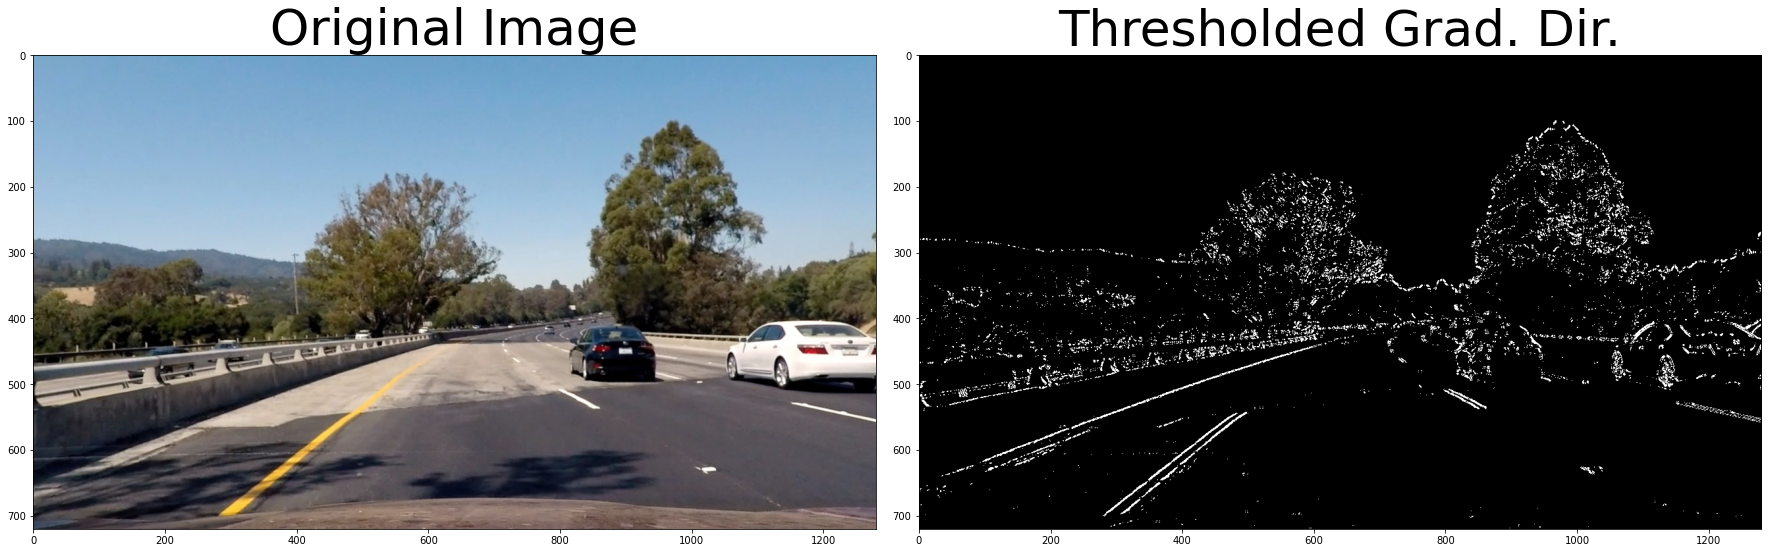

In [629]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
# Apply each of the thresholding functions

undistorted = cv2.undistort(image, mtx, dist, None, mtx)
gradx = abs_sobel_thresh(undistorted,'x', (20, 150))
grady = abs_sobel_thresh(undistorted,'y', (20, 150))

mag_binary = mag_thresh(undistorted, 3, (170, 255))
dir_binary = dir_threshold(undistorted, 3, thresh=(0.7, 1.3))

combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1


# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(undistorted)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Now let's explore the color spaces

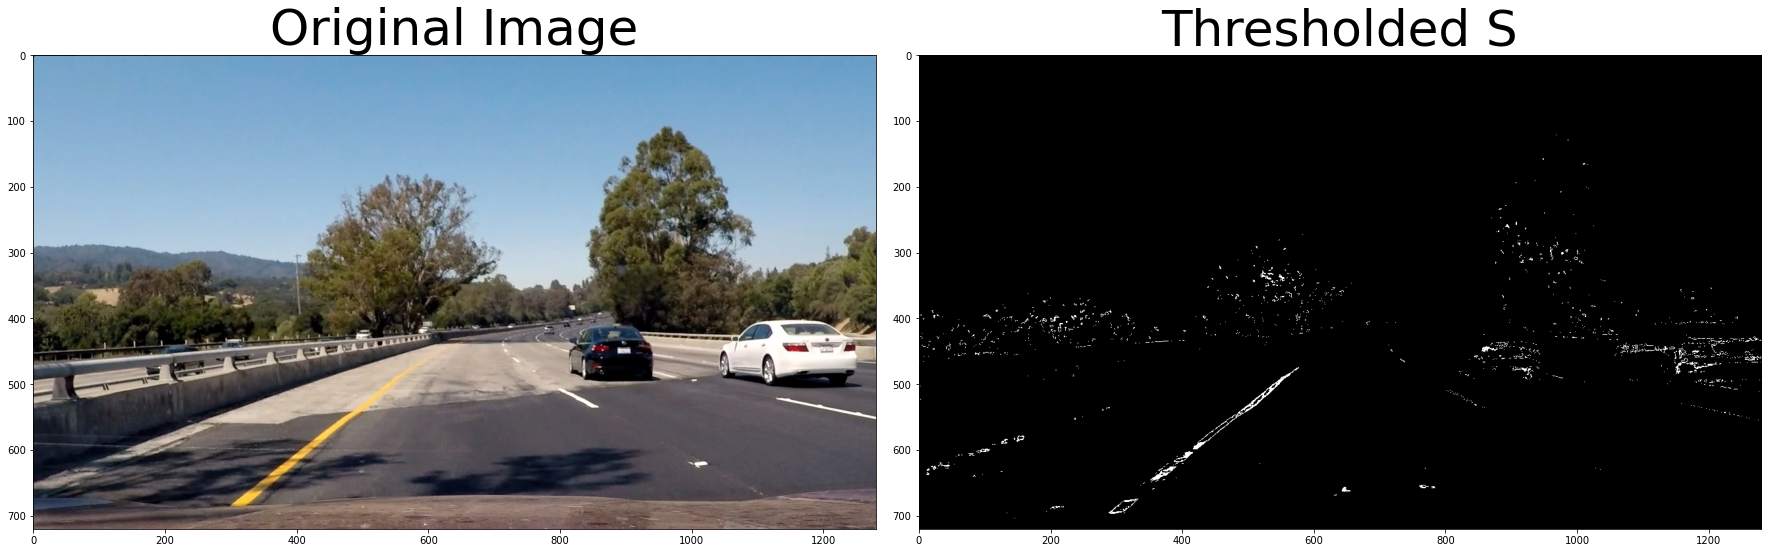

In [630]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
# Define a function that thresholds the S-channel of HLS
def hls_select(img, thresh):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    return binary_output

undistorted = cv2.undistort(image, mtx, dist, None, mtx)
hls_binary = hls_select(undistorted, (190, 245))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Now lets combine the color and gradient

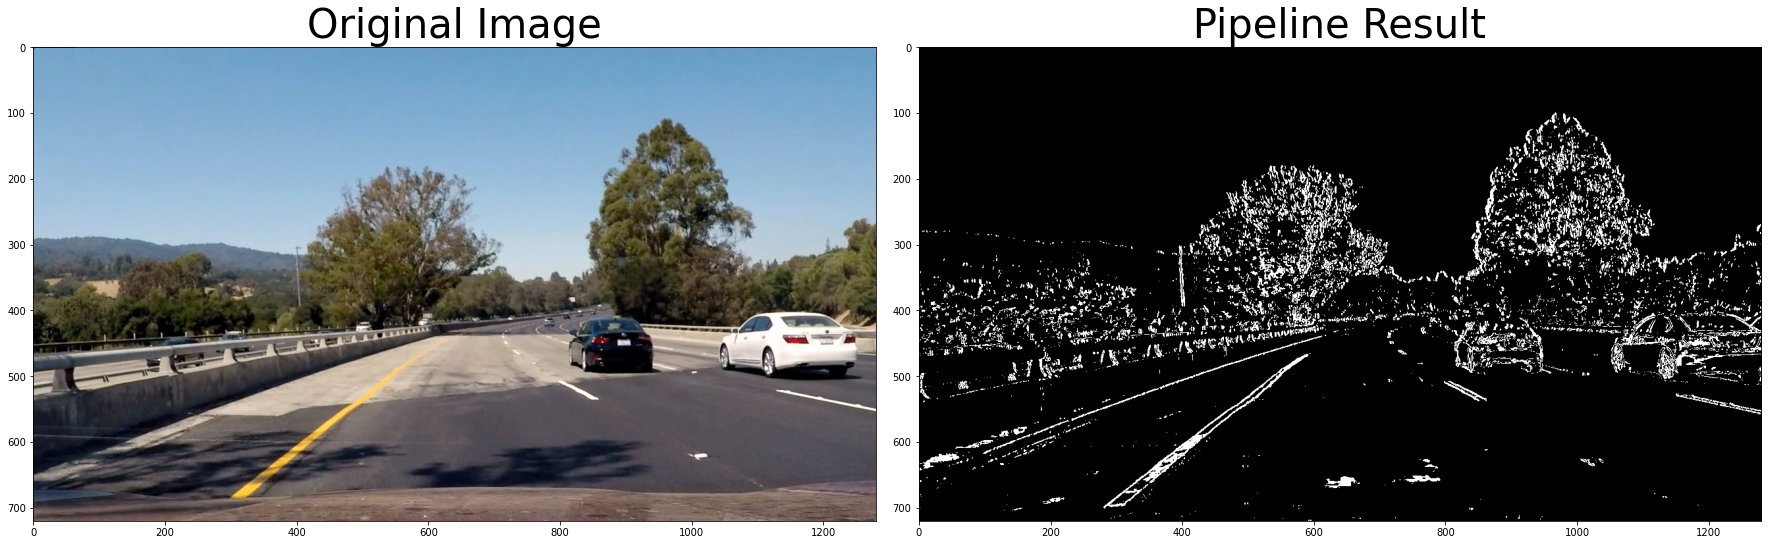

In [631]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE

def combine_color_gradient(img, s_thresh=(150, 235), sx_thresh=(25, 120)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    return combined_binary
    
undistorted = cv2.undistort(image, mtx, dist, None, mtx)
result = combine_color_gradient(undistorted)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result, cmap='gray')
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Warp image

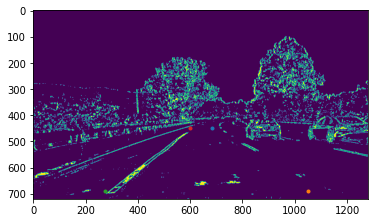

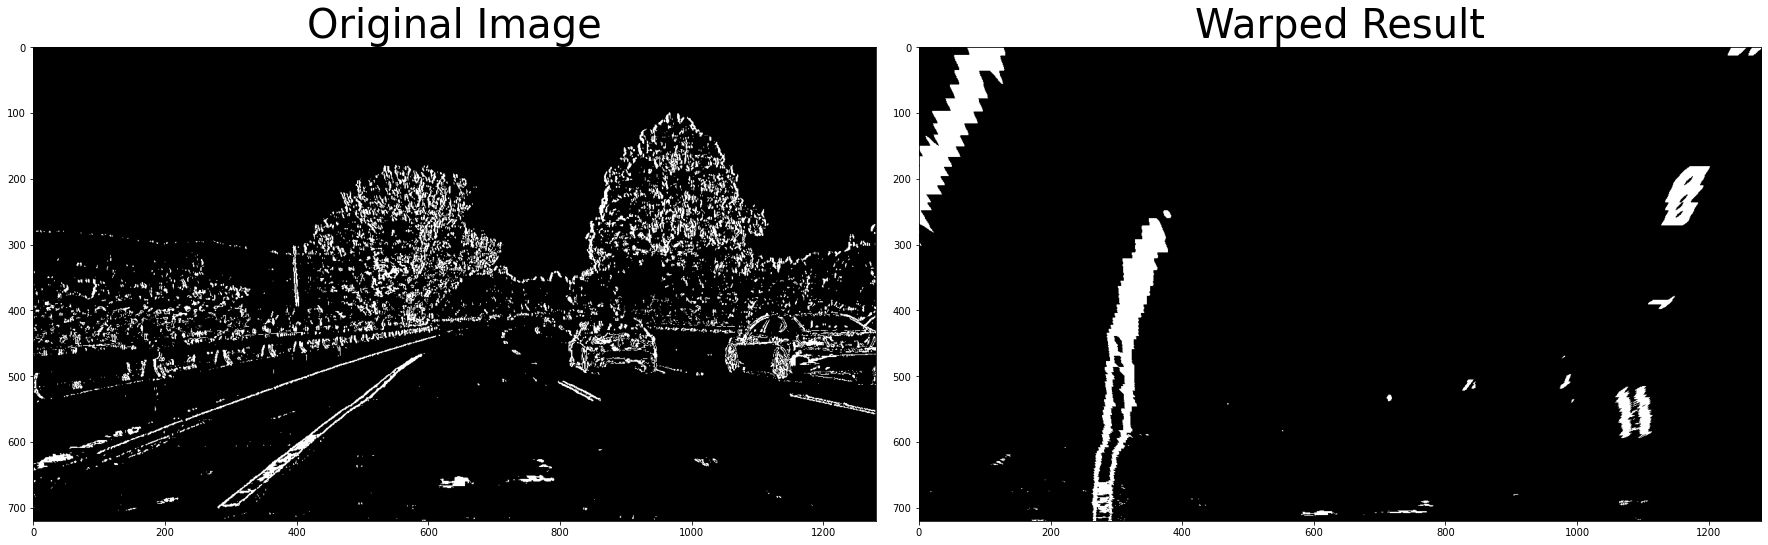

In [632]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
plt.imshow(result)
# plt.plot(700, 450, '.')  # top right
# plt.plot(1090, 720, '.') # bottom right
# plt.plot(190, 720, '.')  # bottom left
# plt.plot(600, 450, '.')  # top left

plt.plot(685, 450, '.')  # top right
plt.plot(1050, 690, '.') # bottom right
plt.plot(275, 690, '.')  # bottom left
plt.plot(600, 450, '.')  # top left

def warp(img):
    img_size = (img.shape[1], img.shape[0])
    src = np.float32(
        [[685, 450],
        [1050, 690],
        [275, 690],
        [590, 450]])
    #     X ,  Y
    
    dst = np.float32(
        [[1000, 0], 
        [1000, 720],
        [250, 720], 
        [250, 0]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    # To undo the warp
    # M = cv2.getPerspectiveTransform(dst, src)
    warped =  cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped



def unwarp(img):
    img_size = (img.shape[1], img.shape[0])
    src = np.float32(
        [[685, 450],
        [1050, 690],
        [275, 690],
        [590, 450]])
    #     X ,  Y
    
    dst = np.float32(
        [[1000, 0], 
        [1000, 720],
        [250, 720], 
        [250, 0]])
    
    M = cv2.getPerspectiveTransform(dst, src)
    # To undo the warp
    unwarped =  cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return unwarped


warped_image = warp(result)
    
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(result, cmap='gray')
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(warped_image, cmap='gray')
ax2.set_title('Warped Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    

## Let's Locate the Lane Lines

Lane finding peaks in the below histogram

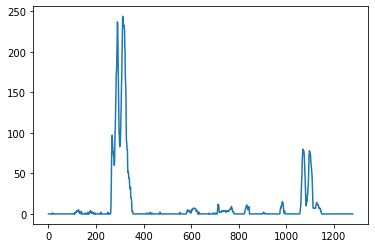

In [633]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
def hist(img):
    # Grab only the bottom half of the image
    # Lane lines are likely to be mostly vertical nearest to the car
    bottom_half = img[img.shape[0]//2:,:]

    # Sum across image pixels vertically - make sure to set an `axis`
    # i.e. the highest areas of vertical lines should be larger values
    histogram = np.sum(bottom_half, axis=0)
    
    return histogram

# Create histogram of image binary activations
histogram = np.sum(warped_image[warped_image.shape[0]//2:,:], axis=0)

# Visualize the resulting histogram
plt.plot(histogram)

## Implement Sliding Windows and Fit a Polynomial

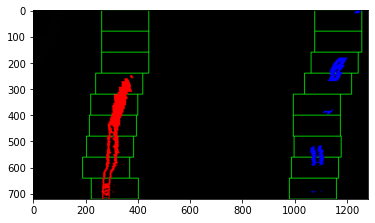

In [634]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
binary_warped = warped_image

def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 90
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    #plt.plot(left_fitx, ploty, color='yellow')
    #plt.plot(right_fitx, ploty, color='yellow')
    #print(left_fit)
    return out_img, left_fit, right_fit

img_result, left_fit_result, right_fit_result = fit_polynomial(binary_warped)

out_img = img_result

plt.imshow(out_img)

## Fit Polynomial

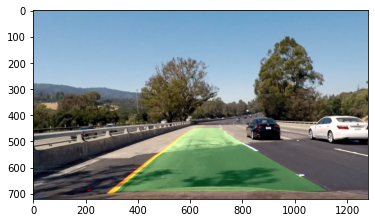

In [635]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE


binary_warped = warped_image

left_fit = left_fit_result
right_fit = right_fit_result

def fit_poly(img_shape, leftx, lefty, rightx, righty):

    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])

    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return left_fitx, right_fitx, ploty

def search_around_poly(binary_warped, img):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    

    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))
    
    
    
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    color_warp[lefty, leftx] = [255, 0, 0]
    color_warp[righty, rightx] = [0, 0, 255]
    
    
    #Highlight the points between the lines
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,55, 0))
        
    
    
    blank_unwarp =  unwarp(color_warp)
    img2 = np.zeros_like(image)
    img2[:,:,:] = blank_unwarp
    img2[:,:,:] = blank_unwarp
    img2[:,:,:] = blank_unwarp
    
    
    #plt.imshow(img2)
    
    undistorted_original = cv2.undistort(img, mtx, dist, None, mtx)
    
    result_unwarped = cv2.addWeighted(blank_unwarp, 1, undistorted_original, 1.0, 0)
            
    cv2.fillPoly(window_img, np.int_([pts]), (0,255, 0))
    
    # highlight edges
    # cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    # cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    
    
    #result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    result = window_img
    
    # Plot the polynomial lines onto the image
    # plt.plot(left_fitx, ploty, color='yellow')
    # plt.plot(right_fitx, ploty, color='yellow')
    
    ## End visualization steps ##
    return result, result_unwarped, ploty, left_fitx, right_fitx

# Run image through the pipeline
# Note that in your project, you'll also want to feed in the previous fits

result_img_warped, result_img_unwarped, ploty_d, left_fitx_d, right_fitx_d = search_around_poly(binary_warped, image)

# View your output
# plt.imshow(result_img_warped)
plt.imshow(result_img_unwarped)

## Calculate the radius of curvature

In [636]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
    
def measure_curvature_real(ploty, left_fitx, right_fitx):
    '''
    Calculates the curvature of polynomial functions in meters.
    '''
    # Conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
       
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
       
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    
    # calculate offset from the lane center
    lane_center = (left_fitx[-1] + right_fitx[-1])/2.0
    camera_center = image.shape[1]/2.0
    offset_center = (lane_center - camera_center) * xm_per_pix
    
    # Calculation of R_curve (in meters)
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    return left_curverad, right_curverad, offset_center


# Calculate the radius of curvature in meters for both lane lines
left_curverad, right_curverad, offset_center = measure_curvature_real(ploty_d, left_fitx_d, right_fitx_d)

print(left_curverad, 'm', right_curverad, 'm', offset_center, 'm')

641.8547698466759 m 509.35158769190195 m 0.19605918549394016 m


## Consolidated Output

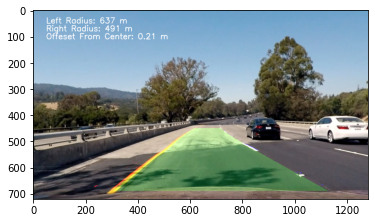

In [637]:
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
##PART OF THIS CODE WAS PROVIDED IN THE MAIN SECTION COURSE
def pipelinefinal(img):
    
    fontScale=1
    
    #undistorted_original = cv2.undistort(img, mtx, dist, None, mtx)
    
    #Apply Sobel
    result = combine_color_gradient(img)
    
    #Warp Image
    warped_image = warp(result)
    
    #Mark Lanes
    img_result, left_fit_result, right_fit_result = fit_polynomial(warped_image)
    result_img_warped, result_img_unwarped, ploty_f, left_fitx_f, right_fitx_f = search_around_poly(warped_image, img)
    
    # Calculate the radius of curvature in meters for both lane lines
    left_curverad, right_curverad, offset_center = measure_curvature_real(ploty_f, left_fitx_f, right_fitx_f)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontColor = (255, 255, 255)
    cv2.putText(result_img_unwarped,'Left Radius: {:.0f} m'.format(left_curverad), (50, 50), font, fontScale, fontColor, 2)
    cv2.putText(result_img_unwarped,'Right Radius: {:.0f} m'.format(right_curverad), (50, 80), font, fontScale, fontColor, 2)
    cv2.putText(result_img_unwarped,'Offeset From Center: {:.2f} m'.format(offset_center), (50, 110), font, fontScale, fontColor, 2)
    
    
    return result_img_unwarped

wrap_result = pipelinefinal(image)

plt.imshow(wrap_result)

## Applying to Videos

In [638]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML


white_output = 'test_videos_output/project_video.mp4'

## You may also uncomment the following line for a subclip of the first 3 seconds
#clip1 = VideoFileClip("test_videos/project_video.mp4").subclip(0,3)
clip1 = VideoFileClip("test_videos/project_video.mp4").subclip(0,25)
#white_clip = clip1.fl_image(pipelinefinal) #NOTE: this function expects color images!!
white_clip = clip1.fl_image(pipelinefinal)
%time white_clip.write_videofile(white_output, audio=False)

t:   0%|          | 3/625 [00:00<00:32, 19.36it/s, now=None]

Moviepy - Building video test_videos_output/project_video.mp4.
Moviepy - Writing video test_videos_output/project_video.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/project_video.mp4
Wall time: 53.7 s
